# De Regresión Softmax a Red Neuronal Softmax - Tarea

El siguiente documento presenta la transformación de la regresión lineal a la red neuronal softmax, con capas ocultas que poseen una función de activación sigmoide.

  Lo primero que se realiza es la importación de las librearias que se van a utilizar en el programa.

In [1]:
# Import data
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

import matplotlib.pyplot as plt

FLAGS = None

%matplotlib inline

Después de importar las librerias se declara una variable "mnist" que contiene las muestras de los números.

In [2]:

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Se separan las imagenes en dos vectores de entrenamiento. Uno para X y otro para Y. Además se crea un metodo que permite imprimir en pantalla la imagen del número que se está identificando.

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


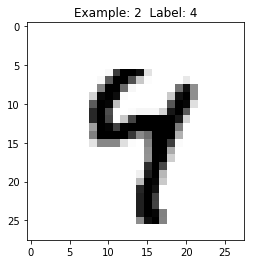

In [3]:
x_train = mnist.train.images[:,:]
y_train = mnist.train.labels[:,:]
    
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    #print(image)
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_digit(2)

Se puede observar que el vector Y de salida, posee 9 ceros y 1 uno. La posición que tiene el 1 representa el número que se presenta en la imagen.

Lo que sigue es crear el modelo:

$ y = f(\Sigma W_i X_i + b) $

Donde: 

$W_i$ son los pesos y en el código es la variable "w".

$X_i$ es el vector de entrada y es la variable "x".

$b$ es el sesgo y es la variable "b".

In [4]:
# se inicializan los placeholder de la entrada
nodos_entrada = x_train.shape[1] # aplasto la imagen en un vector
x = tf.placeholder(tf.float32,(None,nodos_entrada)) # inicializo el placeholder [0,782]

# se inicializan los nodos de la capa oculta
nodos_oculta = 36
W1 = tf.Variable(tf.random_normal((nodos_entrada, nodos_oculta)))
b1 = tf.Variable(tf.zeros(nodos_oculta))
h1 = tf.sigmoid(tf.matmul(x,W1) + b1)

#se inicializan los nodos de la salida
nodos_salida = y_train.shape[1]
y = tf.placeholder(tf.float32,(None,nodos_salida))

W2 = tf.Variable(tf.random_normal((nodos_oculta, nodos_salida)))
b2 = tf.Variable(tf.zeros(nodos_salida))

salida = tf.nn.softmax(tf.matmul(h1,W2) + b2)

'''
print('nodos_entrada: ' + str(nodos_entrada))
print('nodos_oculta: ' + str(nodos_oculta))
print('nodos_salida: ' + str(nodos_salida))
print('x: ' + str(x))
print('y: ' + str(y))
print('W1: ' + str(W1))
print('b1: ' + str(b1))
print('h1: ' + str(h1))
print('W2: ' + str(W2))
print('b2: ' + str(b2))
print('salida: ' + str(salida))
'''

nodos_entrada: 784
nodos_oculta: 36
nodos_salida: 10
x: Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
y: Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)
W1: Tensor("Variable/read:0", shape=(784, 36), dtype=float32)
b1: Tensor("Variable_1/read:0", shape=(36,), dtype=float32)
h1: Tensor("Sigmoid:0", shape=(?, 36), dtype=float32)
W2: Tensor("Variable_2/read:0", shape=(36, 10), dtype=float32)
b2: Tensor("Variable_3/read:0", shape=(10,), dtype=float32)
salida: Tensor("Softmax:0", shape=(?, 10), dtype=float32)


In [5]:
costo = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
        logits=salida, labels=y
    )
)

tasa_de_aprendizaje = 0.01
optimizer = tf.train.AdamOptimizer(tasa_de_aprendizaje).minimize(costo)



#learning_rate = 0.1

#cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=salida, labels=y))
#train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

In [6]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [7]:
# Train

for _ in range(15000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})


In [8]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(salida, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y: mnist.test.labels}))

0.957


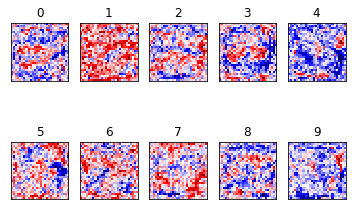

In [9]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W1)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

plt.show()

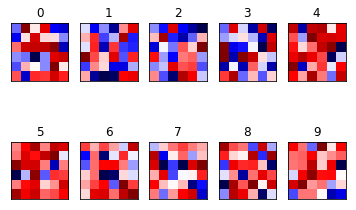

In [10]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W2)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([6,6]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

plt.show()

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


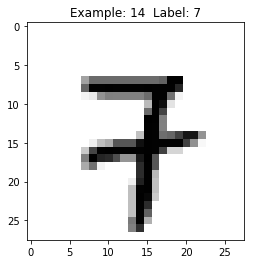

In [57]:
observacion_a_revisar = 14

display_digit(observacion_a_revisar)

In [58]:
answer = sess.run(salida, feed_dict={x: x_train[observacion_a_revisar].reshape(1,784)})
print(answer)

[[  3.87639251e-21   6.15083827e-17   5.26874594e-12   3.46714046e-11
    4.49687674e-16   2.86203454e-15   3.41503345e-23   1.00000000e+00
    1.87310558e-15   4.59392203e-12]]


In [59]:
answer.argmax()

7